# The Similarity Renormalization Group

## The Pairing Modeal

In [31]:
import numpy as np
from numpy import array, dot, diag, reshape
from scipy.linalg import eigvalsh
from scipy.integrate import odeint

import matplotlib.pyplot as plt

In [32]:
from scipy.integrate import odeint
odeint?

**LSODA, written jointly with L. R. Petzold, solves systems dy/dt = f with a dense or banded Jacobian when the problem is stiff, but it automatically selects between nonstiff (Adams) and stiff (BDF) methods. It uses the nonstiff method initially, and dynamically monitors data in order to decide which method to use.**

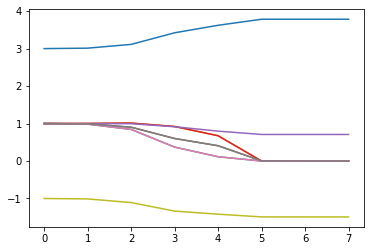

In [37]:
# Solving SRG flow equation using Euler's method

def Hamiltonian(c0,c1,c3,c4,c6,c8):
    
    lambda_0 = array(
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]])
    
    lambda_1 = array(
        [[0, 1, 0],
         [1, 0, 0],
         [0, 0, 0]])

    lambda_3 = array(
        [[1, 0, 0],
         [0, -1, 0],
         [0, 0, 0]])
    
    lambda_4 = array(
        [[0, 0, 1],
         [0, 0, 0],
         [1, 0, 0]])
    
    lambda_6 = array(
        [[0, 0, 0],
         [0, 0, 1],
         [0, 1, 0]])
    
    lambda_8 = array(
        [[1/math.sqrt(3), 0, 0],
         [0, 1/math.sqrt(3), 0],
         [0, 0, -2/math.sqrt(3)]])
    
    H = c0 * lambda_0 + c1 * lambda_1 + c3 * lambda_3 + c4 * lambda_4 + c6 * lambda_6 + c8 * lambda_8
    
    return H

# commutator of matrices
def commutator(a,b):
    
    return dot(a,b) - dot(b,a)

# right-hand side of the flow equation
def derivative(y, dim):
    
    # reshape the solution vector into a dim x dim matrix
    H = reshape(y, (dim,dim))
    
    # extract diagonal Hamiltonian...
    Hd = diag(diag(H))
    
    # ... and construct off-diagonal the Hamiltonian
    Hod = H-Hd
    
    # calculate the generator
    eta = commutator(Hd,Hod)
    
    # dHdt is the derivative in matrix form
    dH = commutator(eta, H)
    
    # convert dH into a linear array for the ODE solver
    dydt = reshape(dH, -1)
    
    return dydt

    

#-------------------------------------
# Main program
#-------------------------------------
def main():
    c0 = 1
    c1 = 1
    c3 = 1
    c4 = 1
    c6 = 1
    c8 = math.sqrt(3)
    
    H0 = Hamiltonian(c0,c1,c3,c4,c6,c8)
#    print(H0)
    
    dim = H0.shape[0]
    
    #calculate exact eigenvalues
    eigenvalues = eigvalsh(H0)
    
    # turn initial Hamiltonian into a linear array
    y0 = reshape(H0, -1)
    
    # flow parameters for snapshot images
    flowparams = array([0.,0.001,0.01,0.05,0.1,1.,5.,10.])
    
    ds = 0.001
    ys = y0
    ys_list = [y0]
    
    for i in range(10000):
        
        ys = ys + derivative(ys, dim)*ds
        
        if i == 0:
            ys_list.append(ys)
            
        if i == 9:
            ys_list.append(ys)
            
        if i == 49:
            ys_list.append(ys)
        
        if i == 99:
            ys_list.append(ys)
        
        if i == 999:
            ys_list.append(ys)
            
        if i == 4999:
            ys_list.append(ys)
            
        if i == 9999:
            ys_list.append(ys)
    
    # integrate flow eqautions - odeint returns an array of solutions, which are 1d arrays themselves
    # ys = odeint(derivative, y0, flowparams, args=(dim,))
    
    # reshape individual solution vectors into dim x dim Hamiltonian matrices
    Hs = reshape(ys_list,(-1,dim,dim))
    
    plt.plot(ys_list)

main()

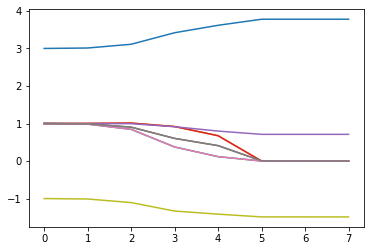

In [38]:
# Solving SRG flow equation using odeint

def Hamiltonian(c0,c1,c3,c4,c6,c8):
    
    lambda_0 = array(
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]])
    
    lambda_1 = array(
        [[0, 1, 0],
         [1, 0, 0],
         [0, 0, 0]])

    lambda_3 = array(
        [[1, 0, 0],
         [0, -1, 0],
         [0, 0, 0]])
    
    lambda_4 = array(
        [[0, 0, 1],
         [0, 0, 0],
         [1, 0, 0]])
    
    lambda_6 = array(
        [[0, 0, 0],
         [0, 0, 1],
         [0, 1, 0]])
    
    lambda_8 = array(
        [[1/math.sqrt(3), 0, 0],
         [0, 1/math.sqrt(3), 0],
         [0, 0, -2/math.sqrt(3)]])
    
    H = c0 * lambda_0 + c1 * lambda_1 + c3 * lambda_3 + c4 * lambda_4 + c6 * lambda_6 + c8 * lambda_8
    
    return H

# commutator of matrices
def commutator(a,b):
    
    return dot(a,b) - dot(b,a)

# right-hand side of the flow equation
def derivative(y, t, dim):
    
    # reshape the solution vector into a dim x dim matrix
    H = reshape(y, (dim,dim))
    
    # extract diagonal Hamiltonian...
    Hd = diag(diag(H))
    
    # ... and construct off-diagonal the Hamiltonian
    Hod = H-Hd
    
    # calculate the generator
    eta = commutator(Hd,Hod)
    
    # dHdt is the derivative in matrix form
    dH = commutator(eta, H)
    
    # convert dH into a linear array for the ODE solver
    dydt = reshape(dH, -1)
    
    return dydt

#-------------------------------------
# Main program
#-------------------------------------
def main():
    c0 = 1
    c1 = 1
    c3 = 1
    c4 = 1
    c6 = 1
    c8 = math.sqrt(3)
    
    H0 = Hamiltonian(c0,c1,c3,c4,c6,c8)
#    print(H0)
    
    dim = H0.shape[0]
    
    #calculate exact eigenvalues
    eigenvalues = eigvalsh(H0)
    
    # turn initial Hamiltonian into a linear array
    y0 = reshape(H0, -1)
    
    # flow parameters for snapshot images
    flowparams = array([0.,0.001,0.01,0.05,0.1,1.,5.,10.])
    
    # integrate flow eqautions - odeint returns an array of solutions, which are 1d arrays themselves
    ys = odeint(derivative, y0, flowparams, args=(dim,))
    
    # reshape individual solution vectors into dim x dim Hamiltonian matrices
    Hs = reshape(ys,(-1,dim,dim))
    
    plt.plot(ys)

main()

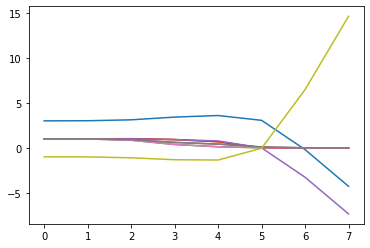

In [35]:
# Solving the equations using the Euler's method

lambda_0 = array(
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]])
    
lambda_1 = array(
        [[0, 1, 0],
         [1, 0, 0],
         [0, 0, 0]])

lambda_3 = array(
        [[1, 0, 0],
         [0, -1, 0],
         [0, 0, 0]])
    
lambda_4 = array(
        [[0, 0, 1],
         [0, 0, 0],
         [1, 0, 0]])
    
lambda_6 = array(
        [[0, 0, 0],
         [0, 0, 1],
         [0, 1, 0]])
    
lambda_8 = array(
        [[1/math.sqrt(3), 0, 0],
         [0, 1/math.sqrt(3), 0],
         [0, 0, -2/math.sqrt(3)]])

def derivative(c):
    
    #dcdt = array(
    #       [[0],
    #       [-4*c[2]**2*c[1] + 2*math.sqrt(3)*c[3]*c[4]*c[5]],
    #       [(4*c[1]**2 + c[3]**2 + c[4]**2)*c[2] + math.sqrt(3)*c[3]**2*c[5] - math.sqrt(3)*c[4]**2*c[5]],
    #       [-(c[2]**2 + 3*c[5]**2 + 2*math.sqrt(3)*c[2]*c[5])*c[3] + 3*c[1]*c[2]*c[4] - math.sqrt(3)*c[1]*c[4]*c[5]],
    #       [-(c[2]**2 + 3*c[5]**2 - 2*math.sqrt(3)*c[2]*c[5])*c[4] - 3*c[1]*c[2]*c[3] - math.sqrt(3)*c[1]*c[3]*c[5]],
    #       [3*(c[3]**2 + c[4]**2)*c[5] + math.sqrt(3)*c[2]*c[3]**2 - math.sqrt(2)]])
    
    dcdt = array([0,-4*c[2]**2*c[1] + 2*math.sqrt(3)*c[3]*c[4]*c[5],(4*c[1]**2 + c[3]**2 + c[4]**2)*c[2] + math.sqrt(3)*c[3]**2*c[5] - math.sqrt(3)*c[4]**2*c[5],-(c[2]**2 + 3*c[5]**2 + 2*math.sqrt(3)*c[2]*c[5])*c[3] + 3*c[1]*c[2]*c[4] - math.sqrt(3)*c[1]*c[4]*c[5],-(c[2]**2 + 3*c[5]**2 - 2*math.sqrt(3)*c[2]*c[5])*c[4] - 3*c[1]*c[2]*c[3] - math.sqrt(3)*c[1]*c[3]*c[5],3*(c[3]**2 + c[4]**2)*c[5] + math.sqrt(3)*c[2]*c[3]**2 - math.sqrt(2)])
    return dcdt

# initial Hamiltonian

c0 = 1
c1 = 1
c3 = 1
c4 = 1
c6 = 1
c8 = math.sqrt(3)
c_init = array([c0,c1,c3,c4,c6,c8])

cs = c_init

ds = 0.001

cs_list = [c_init]

ys = array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]])

ys_list = [ys]

for i in range(10000):
    
    cs = cs + derivative(cs)*ds
    
    if i == 0:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
            
    if i == 9:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
            
    if i == 49:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
        
    if i == 99:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
        
    if i == 999:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
            
    if i == 4999:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
            
    if i == 9999:
        cs_list.append(cs)
        ys_list.append(array([cs[0]+cs[2]+1/math.sqrt(3)*cs[5],cs[1],cs[3],cs[1],cs[0]-cs[2]+1/math.sqrt(3)*cs[5],cs[4],cs[3],cs[4],cs[0]-2/math.sqrt(3)*cs[5]]))
    
plt.plot(ys_list)



[array([ 3.77845712,  0.71083145, -1.48928857]), array([ 3.77859613,  0.71098142, -1.48957755]), array([ 3.77938065,  0.7117999 , -1.49118055]), array([ 3.77258615,  0.705588  , -1.47817415]), array([ 3.74870884,  0.68412052, -1.43282936]), array([ 3.0529343 ,  0.07146027, -0.12439457]), array([-0.20493749,  6.47456186, -3.26962437]), array([-4.2874204 , 14.63952767, -7.35210728])]


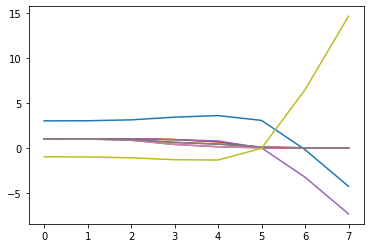

In [36]:
# Solving the equation using odeint

lambda_0 = array(
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]])
    
lambda_1 = array(
        [[0, 1, 0],
         [1, 0, 0],
         [0, 0, 0]])

lambda_3 = array(
        [[1, 0, 0],
         [0, -1, 0],
         [0, 0, 0]])
    
lambda_4 = array(
        [[0, 0, 1],
         [0, 0, 0],
         [1, 0, 0]])
    
lambda_6 = array(
        [[0, 0, 0],
         [0, 0, 1],
         [0, 1, 0]])
    
lambda_8 = array(
        [[1/math.sqrt(3), 0, 0],
         [0, 1/math.sqrt(3), 0],
         [0, 0, -2/math.sqrt(3)]])

def derivative(c, t):
    
    #dcdt = array(
    #       [[0],
    #       [-4*c[2]**2*c[1] + 2*math.sqrt(3)*c[3]*c[4]*c[5]],
    #       [(4*c[1]**2 + c[3]**2 + c[4]**2)*c[2] + math.sqrt(3)*c[3]**2*c[5] - math.sqrt(3)*c[4]**2*c[5]],
    #       [-(c[2]**2 + 3*c[5]**2 + 2*math.sqrt(3)*c[2]*c[5])*c[3] + 3*c[1]*c[2]*c[4] - math.sqrt(3)*c[1]*c[4]*c[5]],
    #       [-(c[2]**2 + 3*c[5]**2 - 2*math.sqrt(3)*c[2]*c[5])*c[4] - 3*c[1]*c[2]*c[3] - math.sqrt(3)*c[1]*c[3]*c[5]],
    #       [3*(c[3]**2 + c[4]**2)*c[5] + math.sqrt(3)*c[2]*c[3]**2 - math.sqrt(2)]])
    
    dcdt = array([0,-4*c[2]**2*c[1] + 2*math.sqrt(3)*c[3]*c[4]*c[5],(4*c[1]**2 + c[3]**2 + c[4]**2)*c[2] + math.sqrt(3)*c[3]**2*c[5] - math.sqrt(3)*c[4]**2*c[5],-(c[2]**2 + 3*c[5]**2 + 2*math.sqrt(3)*c[2]*c[5])*c[3] + 3*c[1]*c[2]*c[4] - math.sqrt(3)*c[1]*c[4]*c[5],-(c[2]**2 + 3*c[5]**2 - 2*math.sqrt(3)*c[2]*c[5])*c[4] - 3*c[1]*c[2]*c[3] - math.sqrt(3)*c[1]*c[3]*c[5],3*(c[3]**2 + c[4]**2)*c[5] + math.sqrt(3)*c[2]*c[3]**2 - math.sqrt(2)])
    return dcdt

# initial Hamiltonian

c0 = 1
c1 = 1
c3 = 1
c4 = 1
c6 = 1
c8 = math.sqrt(3)
c_init = array([c0,c1,c3,c4,c6,c8])

# flow parameters where snapshots are taken

flowparams = array([0.,0.001,0.01,0.05,0.1,1.,5.,10.])

cs = odeint(derivative, c_init, flowparams)

# print(cs[0,0])

ys_list = []

for i in range(8):
    
    ys_list.append(array([cs[i,0]+cs[i,2]+1/math.sqrt(3)*cs[i,5],cs[i,1],cs[i,3],cs[i,1],cs[i,0]-cs[i,2]+1/math.sqrt(3)*cs[i,5],cs[i,4],cs[i,3],cs[i,4],cs[i,0]-2/math.sqrt(3)*cs[i,5]]))

plt.plot(ys_list)

# unitarity check

eig_list = []

for i in range(8):
    
    mat = cs[i,0]*lambda_0 + cs[i,1]*lambda_1 + cs[i,2]*lambda_3 + cs[i,3]*lambda_4 + cs[i,4]*lambda_6 + cs[i,5]*lambda_8
    
    w, v = np.linalg.eig(mat)
    
    eig_list.append(w)
    
print(eig_list)
